In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import pandas as pd
from sklearn import svm, metrics
from PIL import Image

In [ ]:
link_X_train = '/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/HOG/xtrain_HOG.csv'
link_Y_train = '/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/HOG/ytrain_HOG.csv'
link_X_val = '/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/HOG/xval_HOG.csv'
link_Y_val = '/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/HOG/yval_HOG.csv'
link_X_test = '/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/HOG/xtest_HOG.csv'
link_Y_test = '/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/HOG/ytest_HOG.csv'

X_train = pd.read_csv(link_X_train,header=None).to_numpy()
Y_train = pd.read_csv(link_Y_train,header=None).to_numpy()
X_val = pd.read_csv(link_X_val,header=None).to_numpy()
Y_val = pd.read_csv(link_Y_val,header=None).to_numpy()
X_test = pd.read_csv(link_X_test,header=None).to_numpy()
Y_test = pd.read_csv(link_Y_test,header=None).to_numpy()

In [ ]:
labels = os.listdir('/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/data')
labels = sorted(labels)

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 18,18

**Mô hình Logistic Regression :**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Validation set:
Accuracy:  0.7063008130081301




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


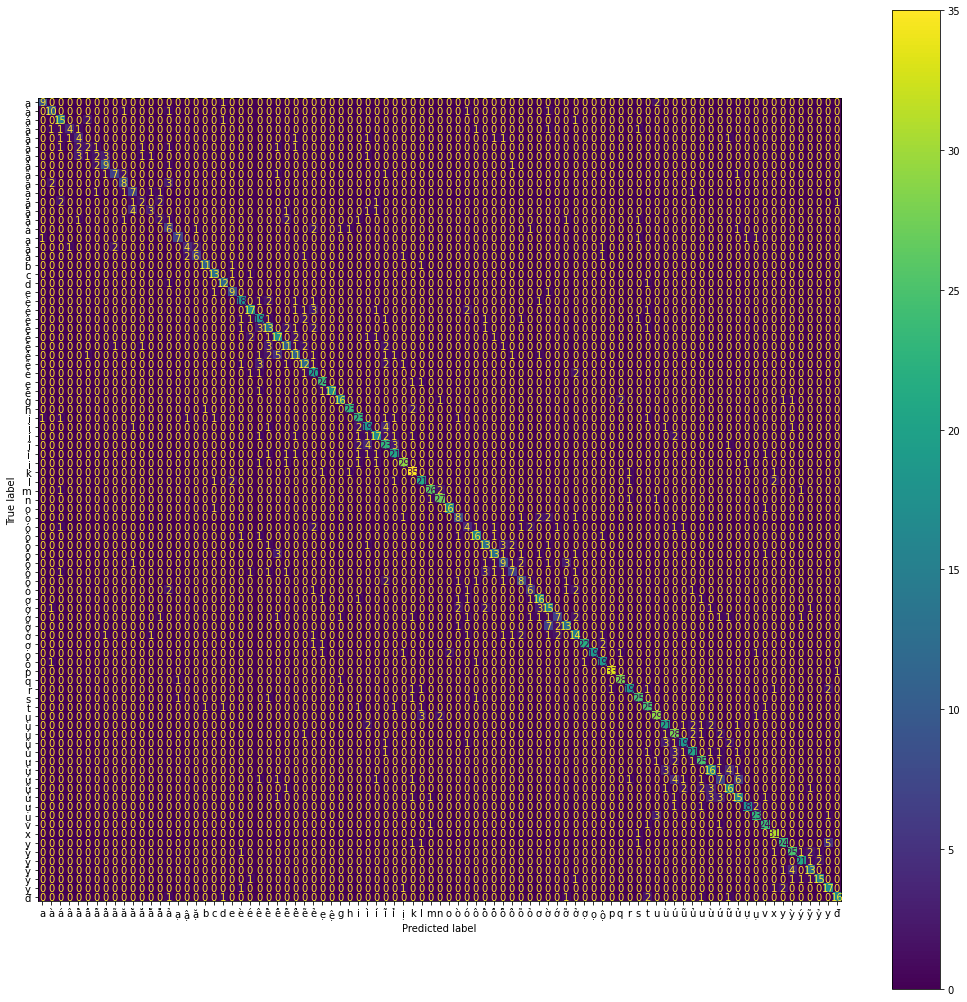

Metrics :
              precision    recall  f1-score   support

           a       0.82      0.75      0.78        12
          à       0.67      0.71      0.69        14
          á       0.62      0.79      0.70        19
          â       0.67      0.40      0.50        10
         ầ       0.36      0.36      0.36        11
         ấ       0.33      0.20      0.25        10
         ẫ       0.33      0.17      0.22        12
         ẩ       0.64      0.69      0.67        13
          ã       0.70      0.54      0.61        13
          ă       0.62      0.62      0.62        13
         ằ       0.50      0.58      0.54        12
         ắ       0.40      0.22      0.29         9
         ẵ       0.50      0.30      0.37        10
         ẳ       0.33      0.20      0.25        10
          ả       0.35      0.46      0.40        13
          ạ       0.78      0.64      0.70        11
         ậ       0.57      0.40      0.47        10
         ặ     

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C = 0.1, max_iter=1000)
lg.fit(X_train, Y_train)

y_pred_val = lg.predict(X_val)
y_pred_test = lg.predict(X_test)
print("\n")
print('Validation set:')
print('Accuracy: ',accuracy_score(y_true=Y_val,y_pred=y_pred_val))
print("\n")
cm1 = plot_confusion_matrix(lg,X_val,Y_val,display_labels=labels)
plt.show(cm1)

print('Metrics :')
result_val = classification_report(y_true=Y_val,y_pred=y_pred_val,target_names=labels)
print(result_val)



Test set:
Accuracy:  0.665974025974026




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


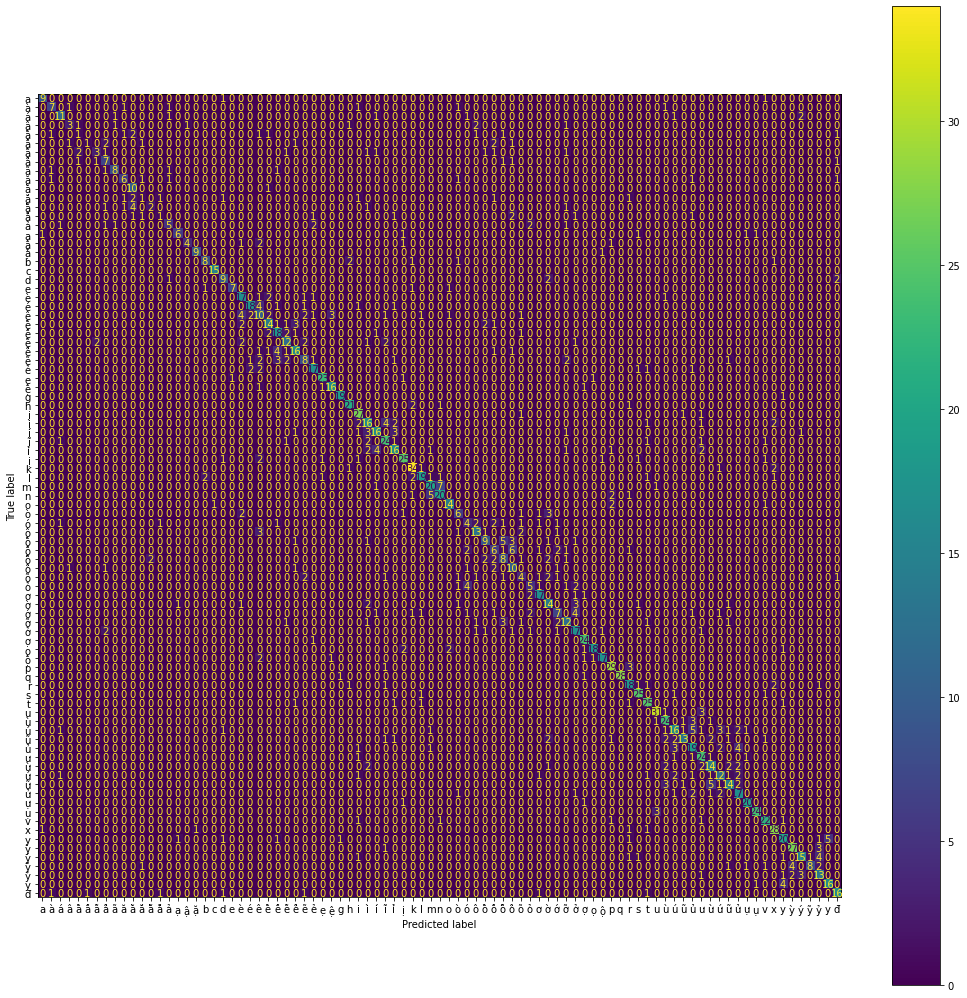

Metrics :
              precision    recall  f1-score   support

           a       0.82      0.82      0.82        11
          à       0.64      0.54      0.58        13
          á       0.69      0.61      0.65        18
          â       0.50      0.30      0.37        10
         ầ       0.20      0.10      0.13        10
         ấ       0.50      0.11      0.18         9
         ẫ       0.50      0.25      0.33        12
         ẩ       0.44      0.58      0.50        12
          ã       0.73      0.67      0.70        12
          ă       0.60      0.50      0.55        12
         ằ       0.53      0.91      0.67        11
         ắ       0.20      0.11      0.14         9
         ẵ       0.50      0.20      0.29        10
         ẳ       0.25      0.11      0.15         9
          ả       0.50      0.38      0.43        13
          ạ       0.75      0.55      0.63        11
         ậ       0.80      0.44      0.57         9
         ặ     

In [ ]:
print('\n')
print('Test set:')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm2 = plot_confusion_matrix(lg,X_test,Y_test,display_labels=labels)
plt.show(cm2)

print('Metrics :')
result_test = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(result_test)

**Mô hình K-nearest Neighbors :**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
y_pred_val2 = knn.predict(X_val)
y_pred_test2 = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)




KNN
Validation set:
Accuracy:  0.5807926829268293




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


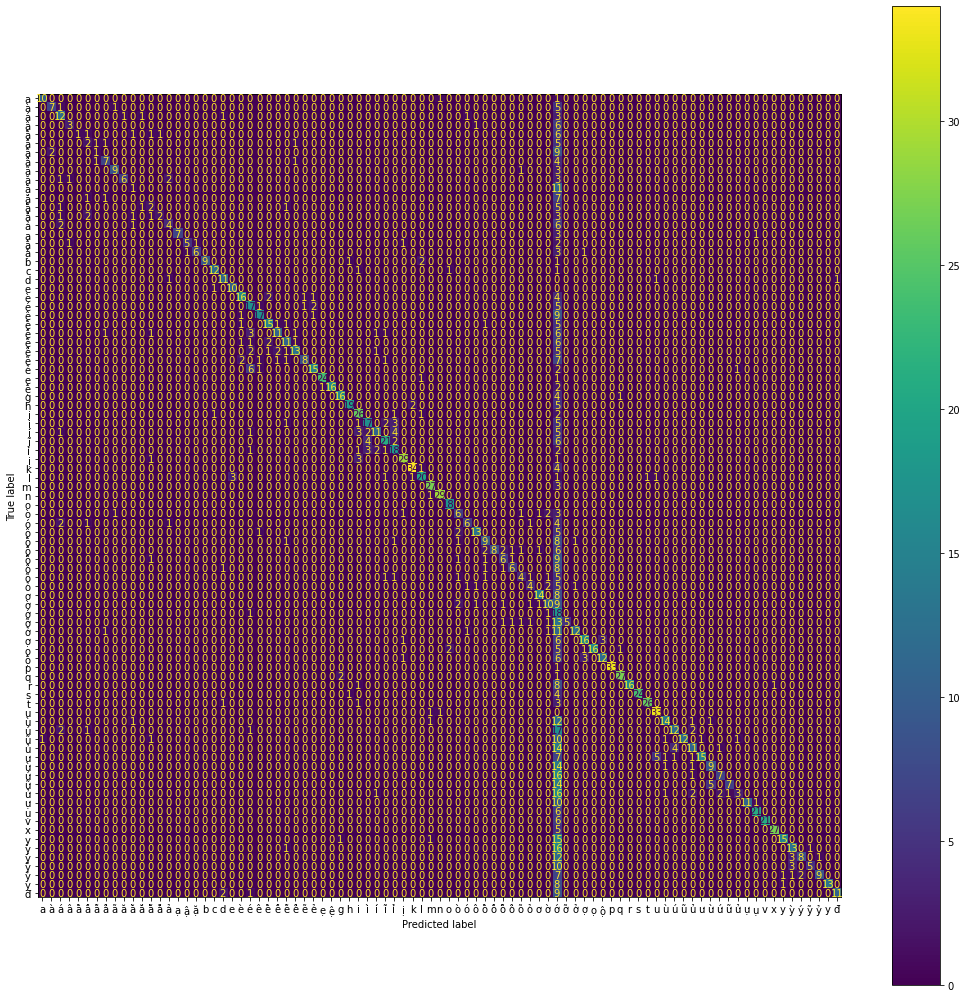

Metrics :
              precision    recall  f1-score   support

           a       0.91      0.83      0.87        12
          à       0.78      0.50      0.61        14
          á       0.52      0.63      0.57        19
          â       0.60      0.30      0.40        10
         ầ       1.00      0.09      0.17        11
         ấ       0.25      0.20      0.22        10
         ẫ       0.33      0.08      0.13        12
         ẩ       0.64      0.54      0.58        13
          ã       0.82      0.69      0.75        13
          ă       0.86      0.46      0.60        13
         ằ       0.20      0.08      0.12        12
         ắ       0.00      0.00      0.00         9
         ẵ       0.25      0.20      0.22        10
         ẳ       0.67      0.20      0.31        10
          ả       0.50      0.31      0.38        13
          ạ       1.00      0.64      0.78        11
         ậ       0.83      0.50      0.62        10
         ặ     

In [ ]:
print("\n")
print("KNN")
print('Validation set:')
print('Accuracy: ',accuracy_score(y_true=Y_val,y_pred=y_pred_val2))
print("\n")
cm2 = plot_confusion_matrix(knn,X_val,Y_val,display_labels=labels)
plt.show(cm2)

print('Metrics :')
result_val2 = classification_report(y_true=Y_val,y_pred=y_pred_val2,target_names=labels)
print(result_val2)



Test set:
Accuracy:  0.5516883116883117




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


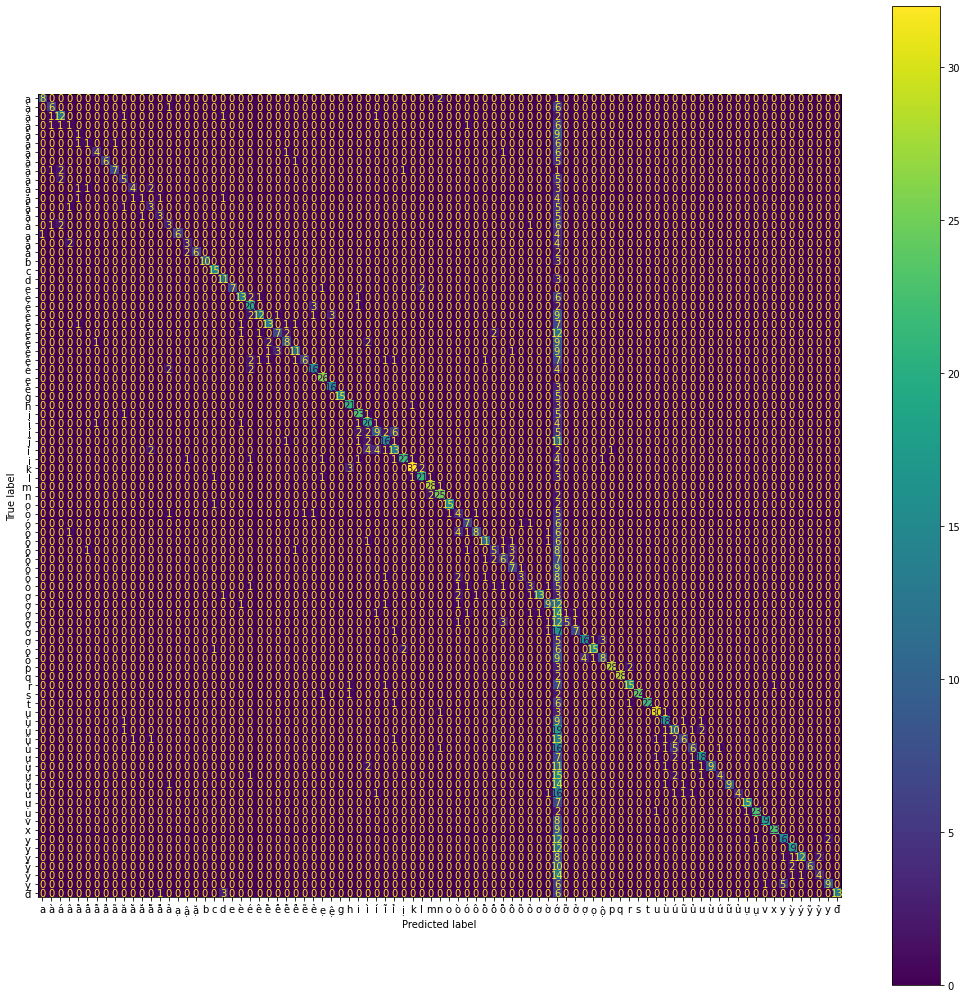

Metrics :
              precision    recall  f1-score   support

           a       0.89      0.73      0.80        11
          à       0.60      0.46      0.52        13
          á       0.63      0.67      0.65        18
          â       0.20      0.10      0.13        10
         ầ       0.20      0.10      0.13        10
         ấ       0.33      0.11      0.17         9
         ẫ       0.67      0.33      0.44        12
         ẩ       1.00      0.50      0.67        12
          ã       0.88      0.58      0.70        12
          ă       0.50      0.42      0.45        12
         ằ       0.67      0.36      0.47        11
         ắ       0.50      0.11      0.18         9
         ẵ       0.38      0.30      0.33        10
         ẳ       0.60      0.33      0.43         9
          ả       0.38      0.23      0.29        13
          ạ       1.00      0.55      0.71        11
         ậ       0.50      0.33      0.40         9
         ặ     

In [ ]:
print('\n')
print('Test set:')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test2))
print('\n')
cm2 = plot_confusion_matrix(knn,X_test,Y_test,display_labels=labels)
plt.show(cm2)

print('Metrics :')
result_test = classification_report(y_true=Y_test,y_pred=y_pred_test2,target_names=labels)
print(result_test)

**Mô hình Random Forest :**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, Y_train)
y_pred_val3 = rf.predict(X_val)
y_pred_test3 = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.




Random Forest
Validation set:
Accuracy:  0.625




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


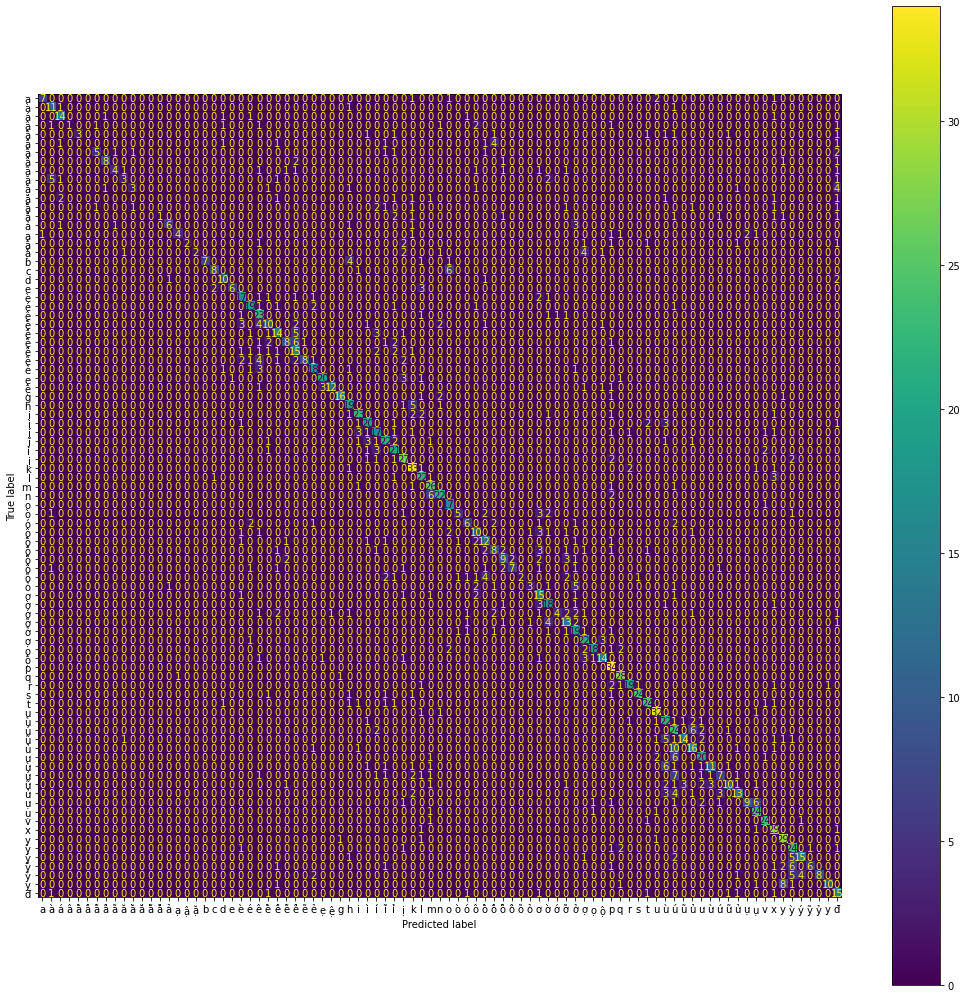

Metrics :
              precision    recall  f1-score   support

           a       0.88      0.58      0.70        12
          à       0.55      0.79      0.65        14
          á       0.70      0.74      0.72        19
          â       1.00      0.10      0.18        10
         ầ       1.00      0.27      0.43        11
         ấ       0.00      0.00      0.00        10
         ẫ       0.71      0.42      0.53        12
         ẩ       0.80      0.62      0.70        13
          ã       0.67      0.31      0.42        13
          ă       0.50      0.23      0.32        13
         ằ       0.60      0.25      0.35        12
         ắ       0.00      0.00      0.00         9
         ẵ       0.00      0.00      0.00        10
         ẳ       1.00      0.10      0.18        10
          ả       0.75      0.46      0.57        13
          ạ       0.80      0.36      0.50        11
         ậ       1.00      0.20      0.33        10
         ặ     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("\n")
print("Random Forest")
print('Validation set:')
print('Accuracy: ',accuracy_score(y_true=Y_val,y_pred=y_pred_val3))
print("\n")
cm3 = plot_confusion_matrix(rf,X_val,Y_val,display_labels=labels)
plt.show(cm3)

print('Metrics :')
result_val3= classification_report(y_true=Y_val,y_pred=y_pred_val3,target_names=labels)
print(result_val3)



Test set:
Accuracy:  0.5974025974025974




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


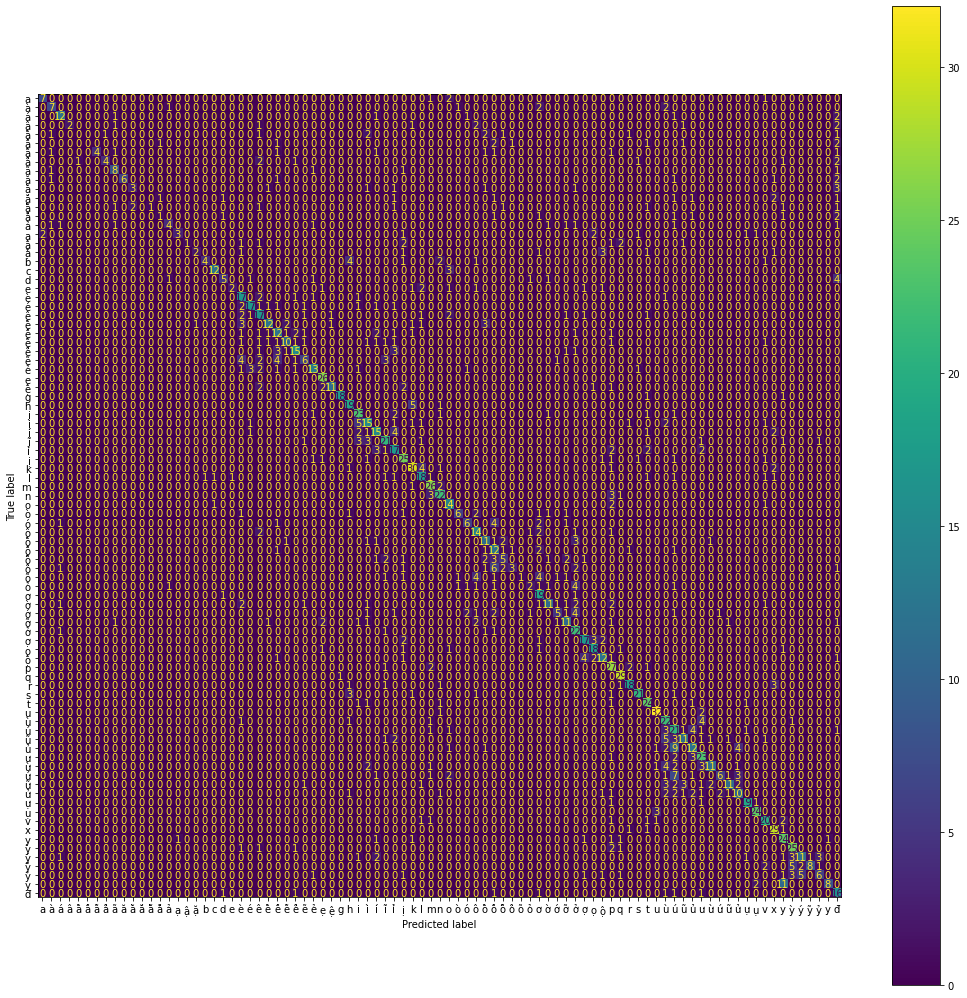

Metrics :
              precision    recall  f1-score   support

           a       0.78      0.64      0.70        11
          à       0.58      0.54      0.56        13
          á       0.67      0.67      0.67        18
          â       1.00      0.20      0.33        10
         ầ       0.00      0.00      0.00        10
         ấ       0.00      0.00      0.00         9
         ẫ       1.00      0.33      0.50        12
         ẩ       0.80      0.33      0.47        12
          ã       0.57      0.67      0.62        12
          ă       1.00      0.50      0.67        12
         ằ       0.60      0.27      0.37        11
         ắ       0.00      0.00      0.00         9
         ẵ       1.00      0.10      0.18        10
         ẳ       0.33      0.11      0.17         9
          ả       0.57      0.31      0.40        13
          ạ       0.75      0.27      0.40        11
         ậ       1.00      0.11      0.20         9
         ặ     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('\n')
print('Test set:')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test3))
print('\n')
cm3 = plot_confusion_matrix(rf,X_test,Y_test,display_labels=labels)
plt.show(cm3)

print('Metrics :')
result_test3 = classification_report(y_true=Y_test,y_pred=y_pred_test3,target_names=labels)
print(result_test3)

**Mô hình SVM :**

In [ ]:
from sklearn.svm import SVC
SVM = SVC(C=1000, kernel = 'linear')
SVM.fit(X_train, Y_train)
y_pred_val4 = SVM.predict(X_val)
y_pred_test4 = SVM.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




SVM
Validation set:
Accuracy:  0.7489837398373984




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


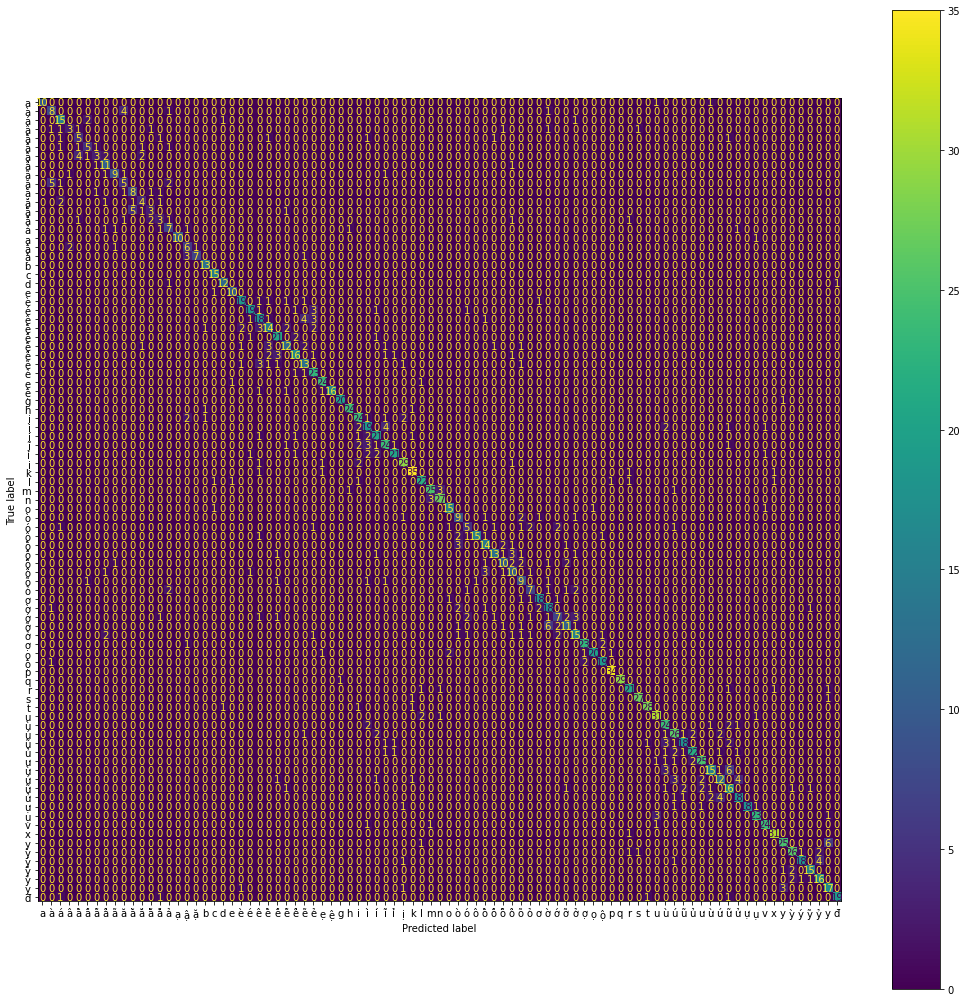

Metrics :
              precision    recall  f1-score   support

           a       1.00      0.83      0.91        12
          à       0.50      0.57      0.53        14
          á       0.65      0.79      0.71        19
          â       0.50      0.30      0.37        10
         ầ       0.42      0.45      0.43        11
         ấ       0.56      0.50      0.53        10
         ẫ       0.50      0.25      0.33        12
         ẩ       0.58      0.85      0.69        13
          ã       0.75      0.69      0.72        13
          ă       0.42      0.38      0.40        13
         ằ       0.57      0.67      0.62        12
         ắ       0.44      0.44      0.44         9
         ẵ       0.43      0.30      0.35        10
         ẳ       0.33      0.30      0.32        10
          ả       0.47      0.54      0.50        13
          ạ       1.00      0.91      0.95        11
         ậ       0.46      0.60      0.52        10
         ặ     

In [ ]:
print("\n")
print("SVM")
print('Validation set:')
print('Accuracy: ',accuracy_score(y_true=Y_val,y_pred=y_pred_val4))
print("\n")
cm4 = plot_confusion_matrix(SVM,X_val,Y_val,display_labels=labels, cmap = "OrRd")
plt.show(cm4)

print('Metrics :')
result_val4= classification_report(y_true=Y_val,y_pred=y_pred_val4,target_names=labels)
print(result_val4)



Test set:
Accuracy:  0.7189610389610389




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


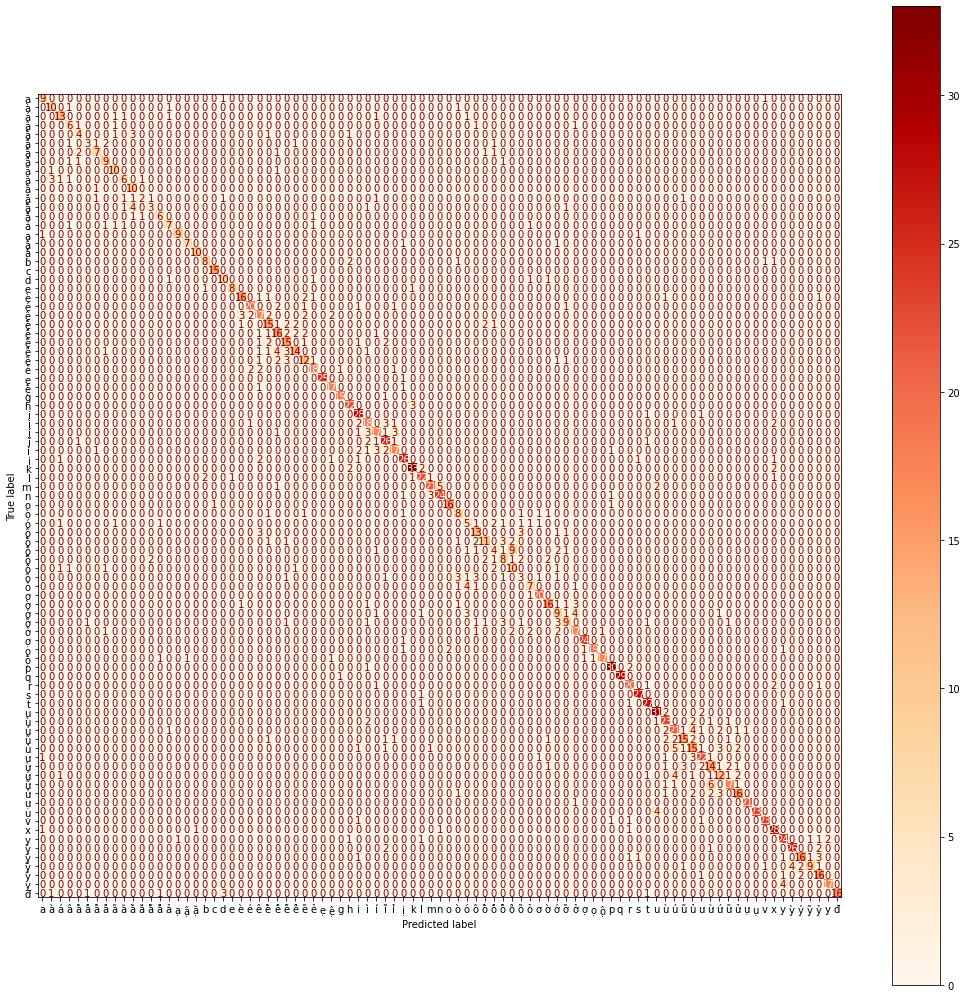

Metrics :
              precision    recall  f1-score   support

           a       0.75      0.82      0.78        11
          à       0.67      0.77      0.71        13
          á       0.72      0.72      0.72        18
          â       0.50      0.60      0.55        10
         ầ       0.44      0.40      0.42        10
         ấ       0.60      0.33      0.43         9
         ẫ       0.64      0.58      0.61        12
         ẩ       0.60      0.75      0.67        12
          ã       0.67      0.83      0.74        12
          ă       0.60      0.50      0.55        12
         ằ       0.53      0.91      0.67        11
         ắ       0.50      0.22      0.31         9
         ẵ       0.50      0.30      0.37        10
         ẳ       0.67      0.67      0.67         9
          ả       0.64      0.54      0.58        13
          ạ       0.90      0.82      0.86        11
         ậ       0.88      0.78      0.82         9
         ặ     

In [ ]:
print('\n')
print('Test set:')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test4))
print('\n')
cm4 = plot_confusion_matrix(SVM,X_test,Y_test,display_labels=labels, cmap = "OrRd")
plt.show(cm4)

print('Metrics :')
result_test4 = classification_report(y_true=Y_test,y_pred=y_pred_test4,target_names=labels)
print(result_test4)

In [ ]:
import joblib
filename = '/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/SVM.sav'
joblib.dump(SVM, filename)

['/content/drive/MyDrive/HK1_2021_2022/MachineLearning/DoAn/SVM.sav']